# 3D Printer DataSet for Mechanical Engineers

Import Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv", sep = ";")
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     int64  
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     int64  
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(10)
memory usage: 4.8 KB


Let's multiply these columns by 100 to make them more understandable.

In [3]:
data.layer_height = data.layer_height*100
data.elongation = data.elongation*100

In [4]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In this data set, ABS and PLA assigned 0 and 1 values for materials.

Seperate Input parameters and Prediction Materials.

In [5]:
y_data = data.material.values
x_data = data.drop(["material"],axis=1)

In [6]:
absm = data[data.material == 0]
pla = data[data.material == 1]

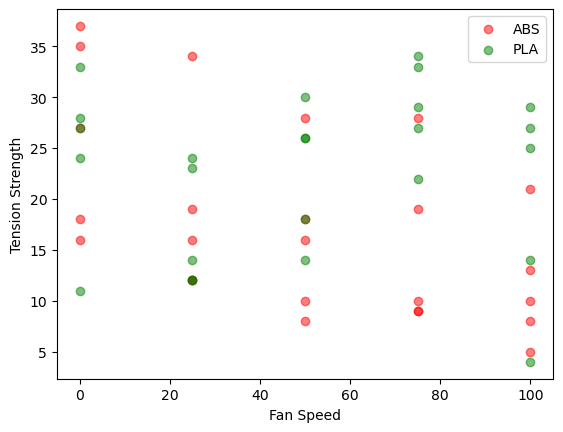

In [9]:
plt.scatter(absm.fan_speed,absm.tension_strength,color="red",label="ABS",alpha= 0.5)
plt.scatter(pla.fan_speed,pla.tension_strength,color="green",label="PLA",alpha= 0.5)
plt.xlabel("Fan Speed")
plt.ylabel("Tension Strength")
plt.legend()
plt.show()

As you see, the air circulation not good for ABS

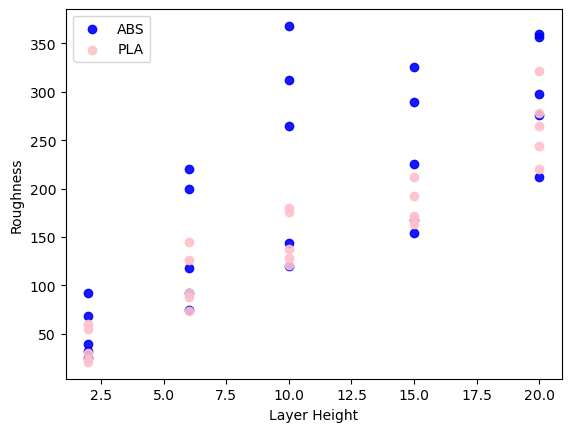

In [10]:
plt.scatter(absm.layer_height,absm.roughness,color="blue",label="ABS",alpha= 0.9)
plt.scatter(pla.layer_height,pla.roughness,color="pink",label="PLA",alpha= 0.9)
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.show()

You can see as the layer height increases, the tensile strength increases. But PLA smoother than ABS

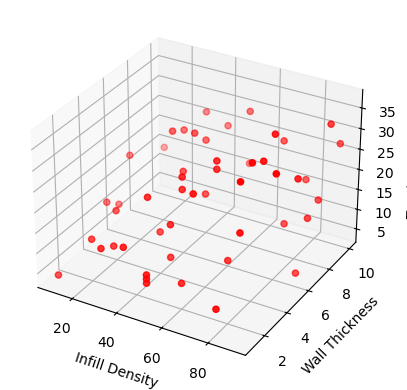

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data.infill_density
y = data.wall_thickness
z = data.tension_strength

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Infill Density')
ax.set_ylabel('Wall Thickness')
ax.set_zlabel('Tension Strength')

plt.show()

#### Below some deprecated methods

In [13]:
# normalization 
# x_norm = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

# # train test split
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_norm,y_data,test_size = 0.3,random_state=1)

# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
# knn.fit(x_train,y_train)
# prediction = knn.predict(x_test)
# print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

# score_list = []
# for each in range(1,15):
#     knn2 = KNeighborsClassifier(n_neighbors = each)
#     knn2.fit(x_train,y_train)
#     score_list.append(knn2.score(x_test,y_test))
#     print(" {} nn score: {} ".format(each,knn2.score(x_test,y_test)))
    
# plt.plot(range(1,15),score_list)
# plt.xlabel("k values")
# plt.ylabel("accuracy")
# plt.show()

In [14]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# from keras.layers import Input, Dense, Flatten
# from keras.optimizers import SGD
# from keras.layers.normalization import BatchNormalization

# model = Sequential()
# model.add(Dense(32,input_dim=11))
# model.add(BatchNormalization(axis = -1))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))
# model.add(Dense(16))
# model.add(Activation('softmax'))

# model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(x_data,y, epochs=500, batch_size =32, validation_split= 0.20)

In [15]:
# a1 = 4 #layer_height*100
# a2 = 5 #wall_thickness
# a3 = 60 #infill_density
# a4 = 0 #infilkk_pattern
# a5 = 232 #nozzle_temperature 
# a6 = 74 #bed_temperature
# a7 = 90 #print_speed
# a8 = 100 #fan_speed
# a9 = 150 #roughness
# a10 = 30 #tension_strength
# a11 = 200 #elangation*100

# tahmin = np.array([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11]).reshape(1,11)
# print(model.predict_classes(tahmin))

# if model.predict_classes(tahmin) == 0: 
#     print("Material is ABS")
# else:   
#     print("Material is PLA.")